## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset and show new DataFrame
merge_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
Mouse_cnt = merge_df["Mouse ID"].value_counts()
print (len(Mouse_cnt))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#cleaning DataFrame by dropping all duplicates. Number of rows dropped from initial combined DataFrame is 10
clean_df = merge_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = False) 
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the clean DataFrame.
Mouse_cnt2 = clean_df["Mouse ID"].value_counts()
print (len(Mouse_cnt2))

249


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
Tumor_Vol_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
Tumor_Vol_df =Tumor_Vol_df.describe()

#assigning column values to a variable
cnt = Tumor_Vol_df["count"]
one_ob = Tumor_Vol_df["50%"]
mean_of_drug = Tumor_Vol_df["mean"]
std = Tumor_Vol_df["std"]
Sqr_cnt = np.sqrt(Tumor_Vol_df["count"])

#equation for variance and then place into column
Tumor_Vol_df["Var"] = ((one_ob-mean_of_drug)**2)/(cnt-1)

#equation for Std error mean and then place into column
Tumor_Vol_df["SEM"] = (std/Sqr_cnt)
Tumor_Vol_df



,count,mean,std,min,25%,50%,75%,max,Var,SEM
Drug Regimen,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.003398,0.329346
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.003753,0.469821
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.006399,0.492236
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.012631,0.603860
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.017950,0.596466
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.016910,0.581331
Propriva,151.0,52.458254,6.637293,45.000000,47.011050,50.854632,56.528101,72.455421,0.017144,0.540135
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.000918,0.320955
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.018028,0.573111


## Bar and Pie Charts

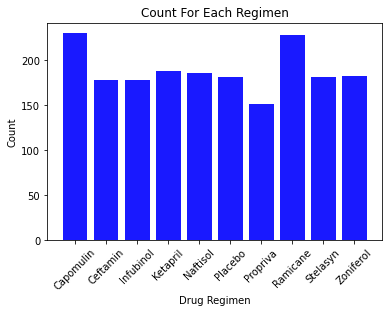

In [6]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(Tumor_Vol_df.index, Tumor_Vol_df["count"], color='b', alpha=0.9, align="center")
plt.title("Count For Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.show()

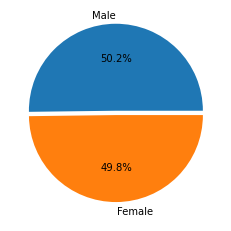

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Gender_df = clean_df.drop_duplicates(subset = ["Mouse ID", "Sex"]) 
Gender_df = Gender_df.value_counts(Gender_df["Sex"])
Gender_df

labels = ["Male", "Female"]
explode = (0.05, 0.0)
plt.pie(Gender_df, autopct="%1.1f%%", explode = explode, labels = labels)
plt.show()

## Quartiles, Outliers and Boxplots

<AxesSubplot:title={'center':'Tumor_Volume_mm3'}, xlabel='[Drug_Regimen]'>

<Figure size 432x288 with 0 Axes>

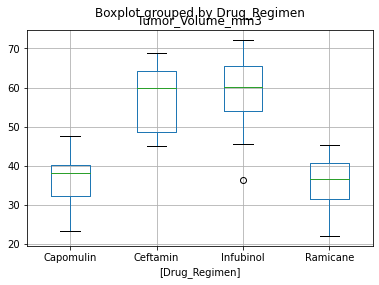

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Fin_Tumor = clean_df.drop_duplicates(subset = ["Mouse ID", "Sex"], keep = "last")
Fin_Tumor2 = Fin_Tumor.rename({"Drug Regimen" : "Drug_Regimen", "Tumor Volume (mm3)": "Tumor_Volume_mm3", "Weight (g)" : "Weight"}, axis = 1)
Fin_Tumor3 = Fin_Tumor2.drop(["Sex", "Age_months", "Weight", "Metastatic Sites", "Mouse ID", "Timepoint"], axis = 1)

#Capomulin Data Frame
Fin_Tumor_Cap = Fin_Tumor3[Fin_Tumor2.Drug_Regimen == "Capomulin"]

#Ramicane Data Frame
Fin_Tumor_Ram = Fin_Tumor3[Fin_Tumor2.Drug_Regimen == "Ramicane"]

#Infubinol Data Frame
Fin_Tumor_Inf = Fin_Tumor3[Fin_Tumor2.Drug_Regimen == "Infubinol"]

#Ceftamin Data Frame
Fin_Tumor_Cef = Fin_Tumor3[Fin_Tumor2.Drug_Regimen == "Ceftamin"]

grouped_df = [Fin_Tumor_Cap, Fin_Tumor_Ram, Fin_Tumor_Inf, Fin_Tumor_Cef]
Drugs_df = pd.concat(grouped_df)

Drugs_df

plt.figure()
Drugs_df.boxplot(by = "Drug_Regimen")

## Line and Scatter Plots

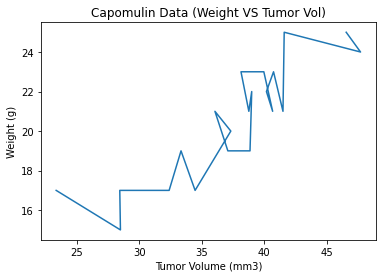

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Cap_df = Fin_Tumor2[Fin_Tumor2.Drug_Regimen == "Capomulin"]
plt.plot(Cap_df.Tumor_Volume_mm3, Cap_df.Weight)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Capomulin Data (Weight VS Tumor Vol)")
plt.show()


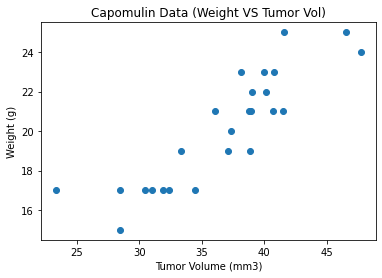

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(Cap_df.Tumor_Volume_mm3, Cap_df.Weight)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Capomulin Data (Weight VS Tumor Vol)")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.88
The slope of this graph is y = 0.44x + 4.02
The r-squared is: 0.7686134812139


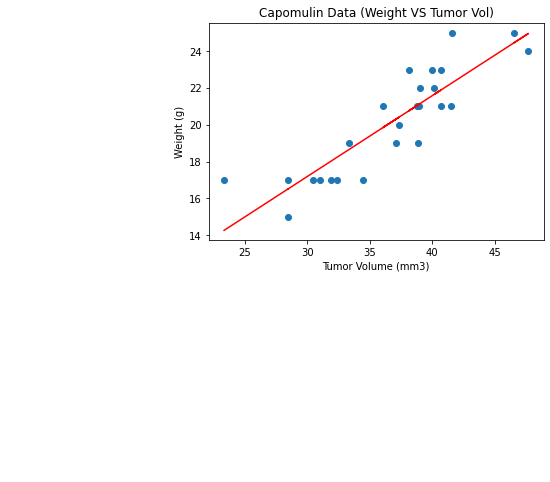

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(Cap_df.Tumor_Volume_mm3, Cap_df.Weight)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Cap_df.Tumor_Volume_mm3, Cap_df.Weight)
regress_values = Cap_df.Tumor_Volume_mm3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(Cap_df.Tumor_Volume_mm3, Cap_df.Weight)
plt.plot(Cap_df.Tumor_Volume_mm3,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,1),fontsize=1,color="red")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Capomulin Data (Weight VS Tumor Vol)")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The slope of this graph is {line_eq}")
print(f"The r-squared is: {rvalue**2}")
plt.show()